In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
prsa_data = pd.read_csv("PRSA_Data.csv")
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,2,3,-1.0,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,3,4,8.0,14.0,-1.0,-1.000000,1024.5,0.0,NW,3.1,Excellent
4,4,5,9.0,-1.0,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


In [4]:
prsa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  35064 non-null  int64  
 1   No          35064 non-null  int64  
 2   SO2         35064 non-null  float64
 3   NO2         35064 non-null  float64
 4   CO          35064 non-null  float64
 5   O3          35064 non-null  float64
 6   PRES        35064 non-null  float64
 7   RAIN        35064 non-null  float64
 8   wd          35064 non-null  object 
 9   WSPM        35064 non-null  float64
 10  AQI Label   35064 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 2.9+ MB


In [5]:
prsa_data.describe()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17531.500000,17532.500000,18.058734,63.236861,1251.121692,45.876835,1010.520250,0.067653,1.500217
std,10122.249256,10122.249256,22.558126,39.109232,1269.033556,54.730861,26.289217,0.896833,1.105382
min,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,8765.750000,8766.750000,4.000000,34.000000,500.000000,2.397428,1002.500000,0.000000,0.800000
50%,17531.500000,17532.500000,10.000000,58.000000,900.000000,27.356346,1010.800000,0.000000,1.200000
75%,26297.250000,26298.250000,22.276800,87.000000,1500.000000,69.548316,1019.400000,0.000000,2.000000
max,35063.000000,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,72.500000,11.200000


In [6]:
prsa_data[prsa_data == -1] = np.nan
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,2,3,NaN,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,3,4,8.0,14.0,NaN,NaN,1024.5,0.0,NW,3.1,Excellent
4,4,5,9.0,NaN,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


<Axes: xlabel='SO2', ylabel='Count'>

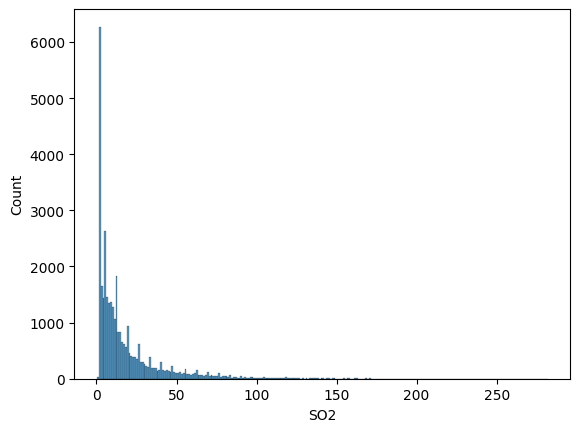

In [7]:
sns.histplot(prsa_data.SO2)

<Axes: xlabel='NO2', ylabel='Density'>

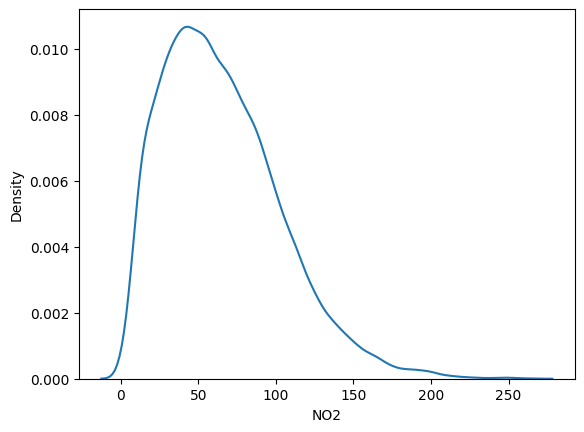

In [8]:
sns.kdeplot(prsa_data.NO2)

In [9]:
prsa_data.RAIN[prsa_data.RAIN > 0]

,RAIN
267,0.1
268,0.4
269,0.1
270,0.9
271,0.9
...,...
34891,0.2
34892,0.7
34893,0.9
34894,0.4


In [10]:
is_rain = np.array(prsa_data.RAIN)
is_rain[is_rain > 0] = 1
prsa_data['IS_RAIN'] = is_rain
prsa_data.drop(['RAIN'], axis=1, inplace=True)
prsa_data.describe()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,WSPM,IS_RAIN
count,35064.000000,35064.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35050.000000,35044.000000
mean,17531.500000,17532.500000,18.376481,65.258789,1319.353513,48.873754,1011.097536,1.501215,0.040977
std,10122.249256,10122.249256,22.609648,37.996088,1268.114331,55.113576,10.355247,1.104472,0.198240
min,0.000000,1.000000,0.285600,1.642400,100.000000,-0.275160,985.900000,0.000000,0.000000
25%,8765.750000,8766.750000,4.000000,36.000000,500.000000,3.579219,1002.500000,0.800000,0.000000
50%,17531.500000,17532.500000,10.000000,60.000000,900.000000,31.945652,1010.800000,1.200000,0.000000
75%,26297.250000,26298.250000,23.000000,88.000000,1600.000000,72.876079,1019.400000,2.000000,0.000000
max,35063.000000,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,11.200000,1.000000


<Axes: xlabel='SO2', ylabel='Density'>

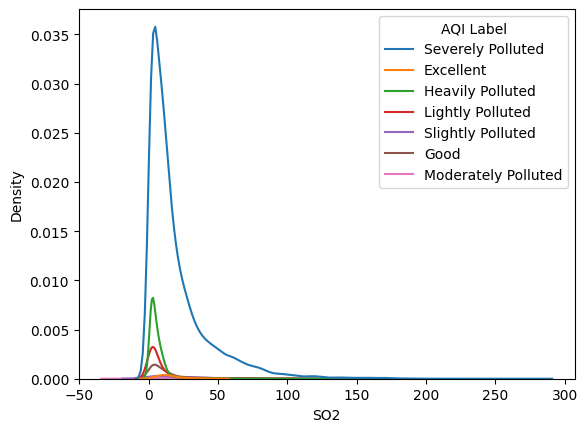

In [11]:
sns.kdeplot(data=prsa_data, x="SO2", hue="AQI Label")

<ipython-input-12-c5b2a0db864b>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)


<Axes: xlabel='CO', ylabel='Density'>

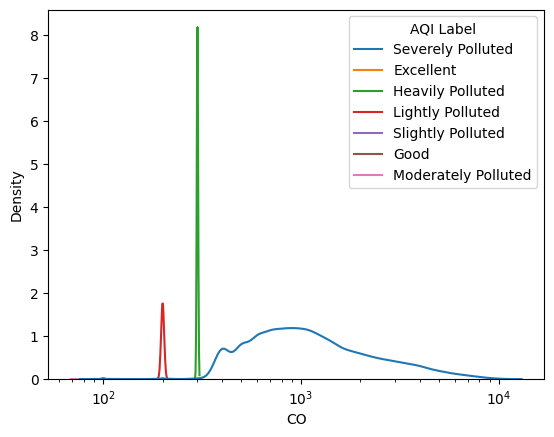

In [12]:
sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)

In [13]:
bin_ranges = [0, 250, 320, 10000]
bin_names = [1, 2, 3]
prsa_data['CO_bin_custom_label'] = pd.cut(np.array(prsa_data['CO']),
                                               bins=bin_ranges, labels=bin_names)
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,6.0,28.0,400.0,50.403851,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,NaN,19.0,400.0,54.923321,1023.5,NNW,5.6,Severely Polluted,0.0,3
3,3,4,8.0,14.0,NaN,NaN,1024.5,NW,3.1,Excellent,0.0,NaN
4,4,5,9.0,NaN,300.0,54.296608,1025.2,N,2.0,Heavily Polluted,0.0,2


In [14]:
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].values.add_categories(0)
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].fillna(0).astype(int)
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,6.0,28.0,400.0,50.403851,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,NaN,19.0,400.0,54.923321,1023.5,NNW,5.6,Severely Polluted,0.0,3
3,3,4,8.0,14.0,NaN,NaN,1024.5,NW,3.1,Excellent,0.0,0
4,4,5,9.0,NaN,300.0,54.296608,1025.2,N,2.0,Heavily Polluted,0.0,2


In [15]:
prsa_data.PRES[prsa_data.PRES <= 992] = 992
prsa_data.PRES[prsa_data.PRES >= 1034] = 1034

<ipython-input-15-5a60bf876b2e>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  prsa_data.PRES[prsa_data.PRES <= 992] = 992
<ipython-input-15-5a60bf876b2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

<Axes: >

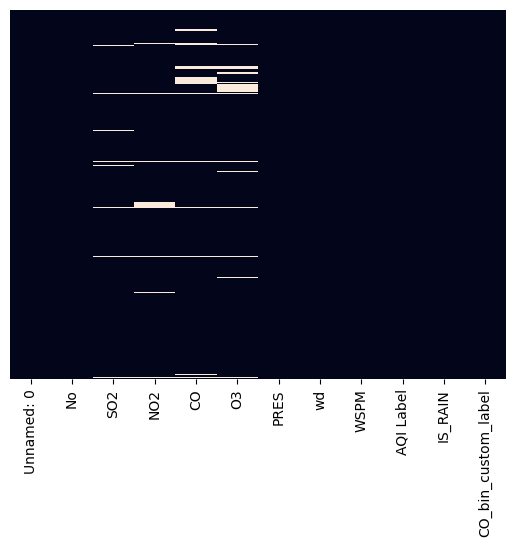

In [16]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

In [17]:
undef = prsa_data.isnull().sum(axis=1)
undef[undef >= 2]

,0
3,2
276,3
435,2
459,2
555,2
...,...
34880,4
34883,4
34885,4
35029,2


In [18]:
prsa_data = prsa_data.drop(undef[undef >= 2].index, axis=0)

In [19]:
prsa_data.isnull().sum()

,0
Unnamed: 0,0
No,0
SO2,281
NO2,702
CO,1028
O3,1300
PRES,0
wd,0
WSPM,0
AQI Label,0


In [20]:
prsa_data.SO2 = prsa_data.SO2.fillna(prsa_data.PRES.mean())

In [21]:
filler = prsa_data.O3[prsa_data.O3.isna()]

In [22]:
filler = prsa_data.O3[~prsa_data.O3.isna()].sample(n=len(filler)).set_axis(filler.index)

In [23]:
prsa_data.O3 = prsa_data.O3.fillna(filler)

In [24]:
prsa_data['O3'] = np.array(np.round((prsa_data['O3'])), dtype='int')
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.000000,28.0,400.0,52,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,6.000000,28.0,400.0,50,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,1011.055986,19.0,400.0,55,1023.5,NNW,5.6,Severely Polluted,0.0,3
4,4,5,9.000000,NaN,300.0,54,1025.2,N,2.0,Heavily Polluted,0.0,2
5,5,6,8.000000,17.0,300.0,54,1025.6,N,3.7,Heavily Polluted,0.0,2


In [25]:
prsa_data.SO2 = np.log(prsa_data.SO2)

## 1. При выполнении 3 и 5 заданий используйте другие методы визуализации. Найдите самый подходящий тип графика для каждого распределения.

### Для задания 3

Столбчатая диаграмма (Bar plot)

In [26]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Количество наблюдений')

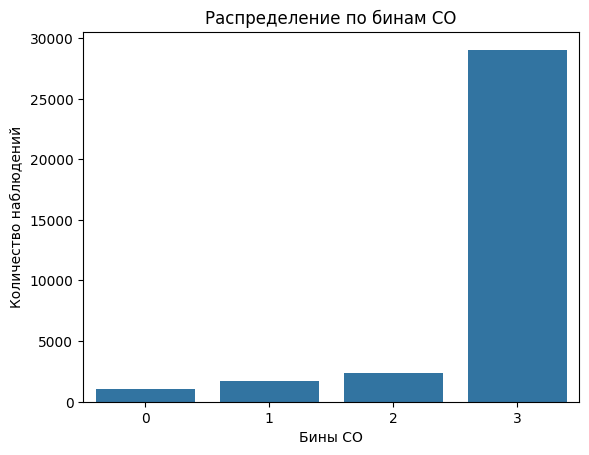

In [27]:
sns.countplot(x='CO_bin_custom_label', data=prsa_data)
plt.title('Распределение по бинам CO')
plt.xlabel('Бины CO')
plt.ylabel('Количество наблюдений')

Круговая диаграмма (Pie chart)

Text(0.5, 1.0, 'Процентное распределение по бинам CO')

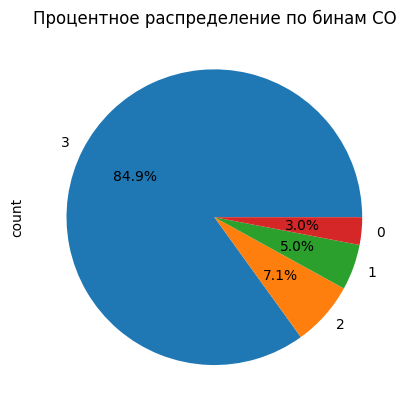

In [28]:
prsa_data['CO_bin_custom_label'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Процентное распределение по бинам CO')

### Для задания 5

Гистограмма с ядерной оценкой плотности

Text(0.5, 0, 'log(SO2)')

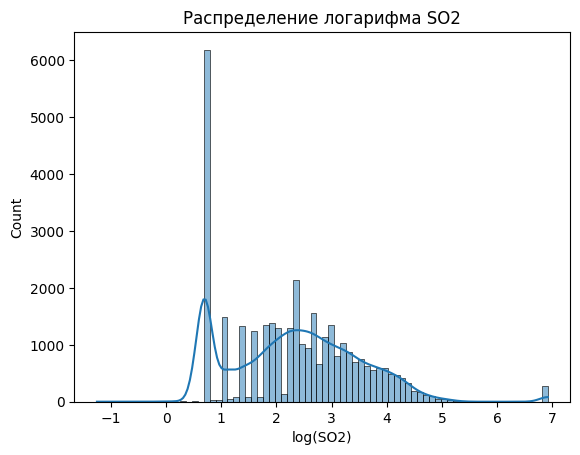

In [29]:
sns.histplot(prsa_data['SO2'], kde=True)
plt.title('Распределение логарифма SO2')
plt.xlabel('log(SO2)')

Box plot

Text(0.5, 1.0, 'Boxplot логарифма SO2')

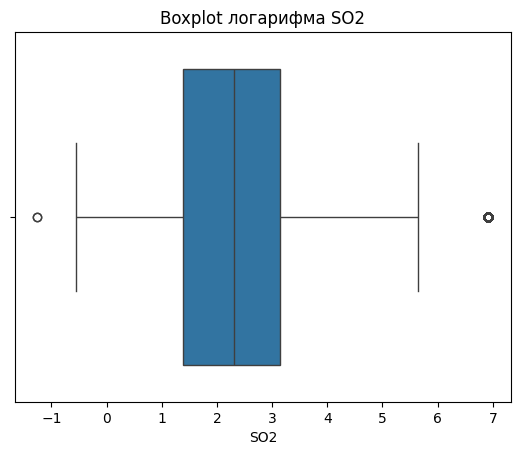

In [30]:
sns.boxplot(x=prsa_data['SO2'])
plt.title('Boxplot логарифма SO2')

Violin plot

Text(0.5, 1.0, 'Распределение логарифма SO2')

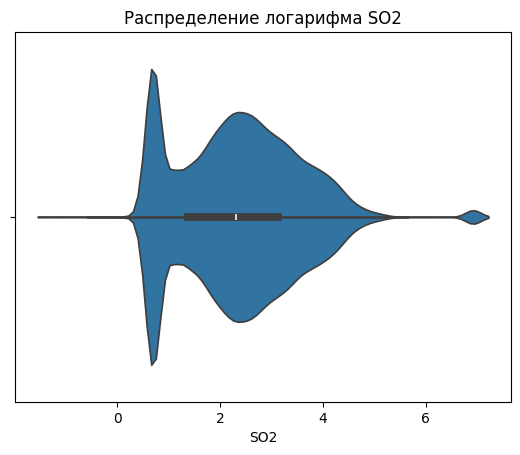

In [31]:
sns.violinplot(x=prsa_data['SO2'])
plt.title('Распределение логарифма SO2')

## 2. При выполнении 6 задания мы явно подбирали руками границы диапазона для клиппинга. Реализуйте адаптивный клиппинг через процентили.

In [32]:
lower_bound = np.percentile(prsa_data.PRES.dropna(), 1)
upper_bound = np.percentile(prsa_data.PRES.dropna(), 99)

In [33]:
prsa_data.PRES[prsa_data.PRES <= lower_bound] = lower_bound
prsa_data.PRES[prsa_data.PRES >= upper_bound] = upper_bound

<ipython-input-33-c230e6c5a832>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  prsa_data.PRES[prsa_data.PRES <= lower_bound] = lower_bound
<ipython-input-33-c230e6c5a832>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [34]:
print(f"Границы клиппинга: нижняя = {lower_bound}, верхняя = {upper_bound}")

Границы клиппинга: нижняя = 992.0, верхняя = 1032.0


## 3. Избавьтесь от оставшихся пропусков в данных. Самостоятельно выберите метод.

In [35]:
print(prsa_data.isnull().sum())

Unnamed: 0                0
No                        0
SO2                       0
NO2                     702
CO                     1028
O3                        0
PRES                      0
wd                        0
WSPM                      0
AQI Label                 0
IS_RAIN                   0
CO_bin_custom_label       0
dtype: int64


Метод - числовые данные

In [36]:
numeric_cols = ['CO', 'NO2', 'PRES']
prsa_data[numeric_cols] = prsa_data[numeric_cols].fillna(prsa_data[numeric_cols].median())

In [37]:
print(prsa_data.isnull().sum())

Unnamed: 0             0
No                     0
SO2                    0
NO2                    0
CO                     0
O3                     0
PRES                   0
wd                     0
WSPM                   0
AQI Label              0
IS_RAIN                0
CO_bin_custom_label    0
dtype: int64


## 4. Проведите нормализацию численных признаков. Выберите наиболее подходящий вид нормализации для каждого признака.

In [38]:
from sklearn.preprocessing import RobustScaler

In [39]:
numeric_cols = prsa_data.select_dtypes(include=['float64', 'int64']).columns
print(numeric_cols)

Index(['Unnamed: 0', 'No', 'SO2', 'NO2', 'CO', 'O3', 'PRES', 'WSPM', 'IS_RAIN',
       'CO_bin_custom_label'],
      dtype='object')


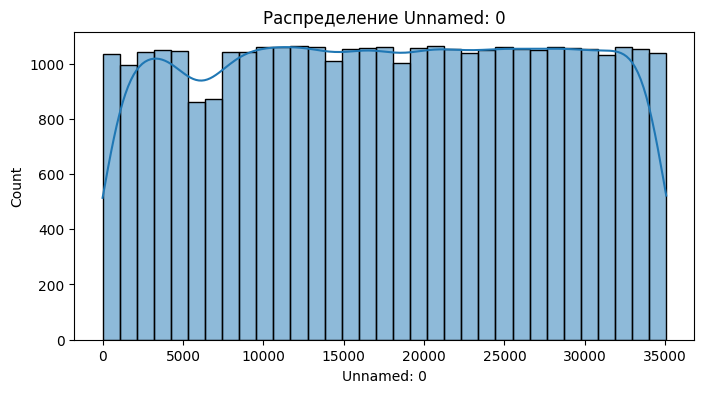

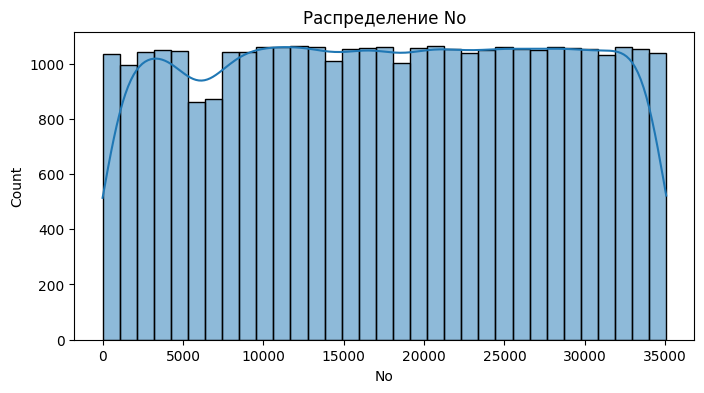

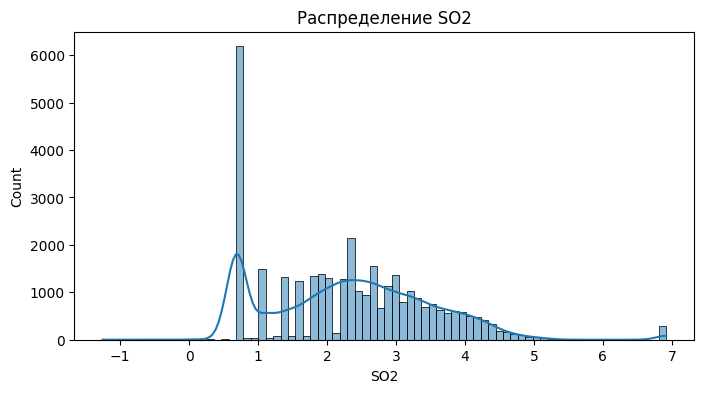

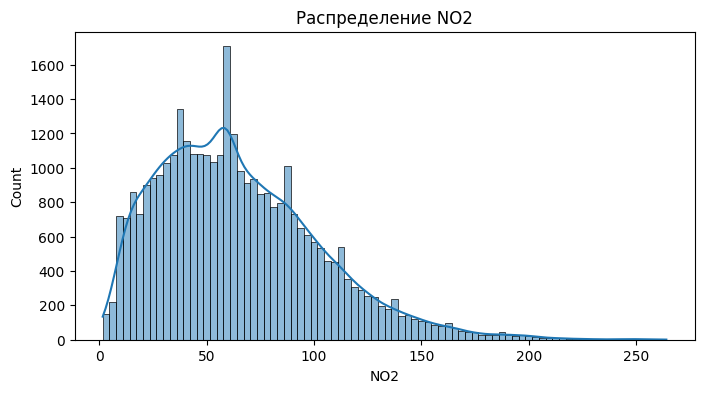

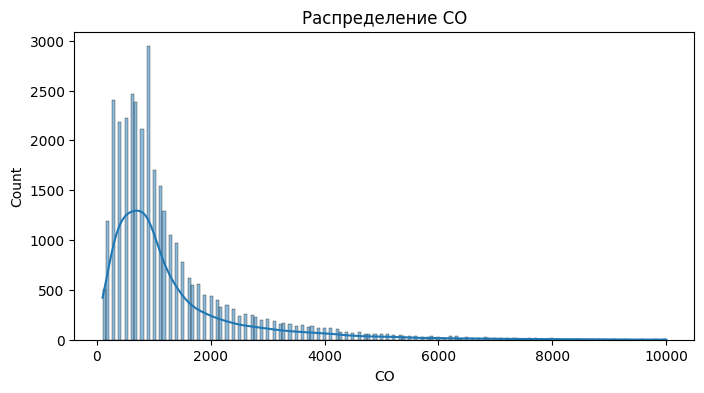

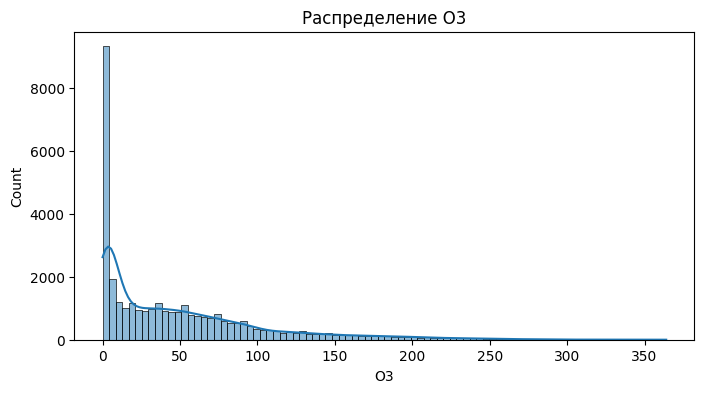

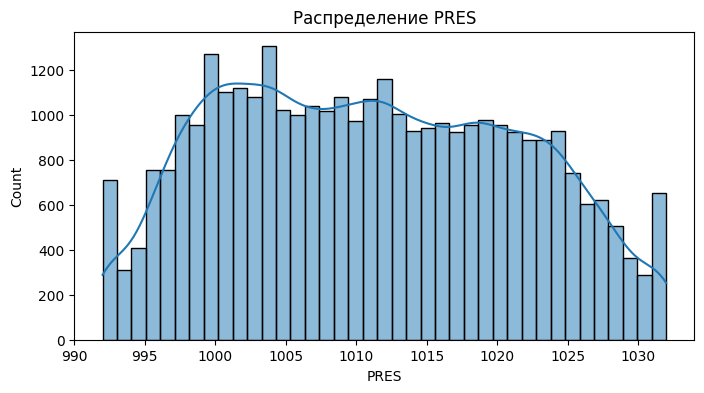

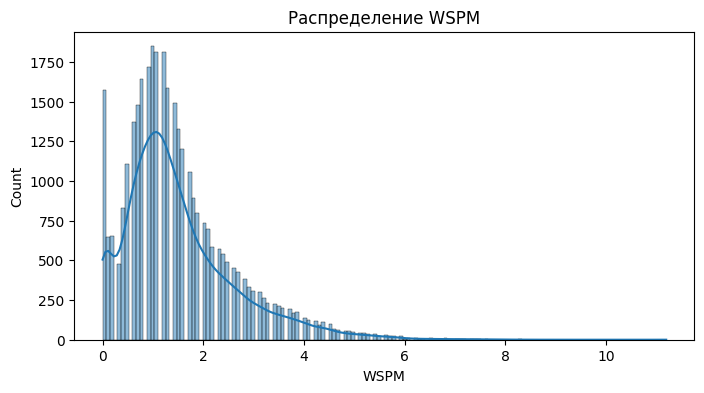

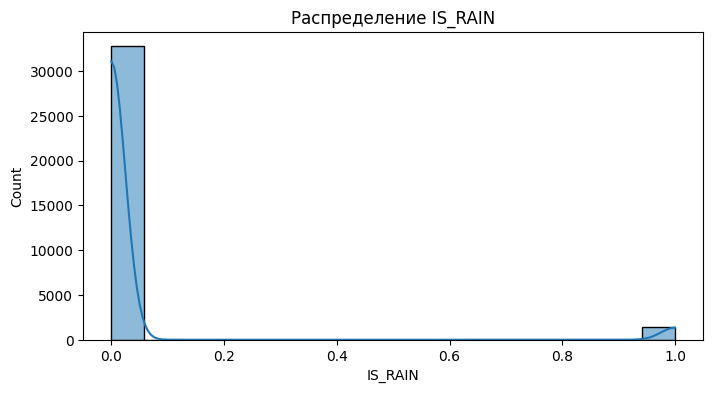

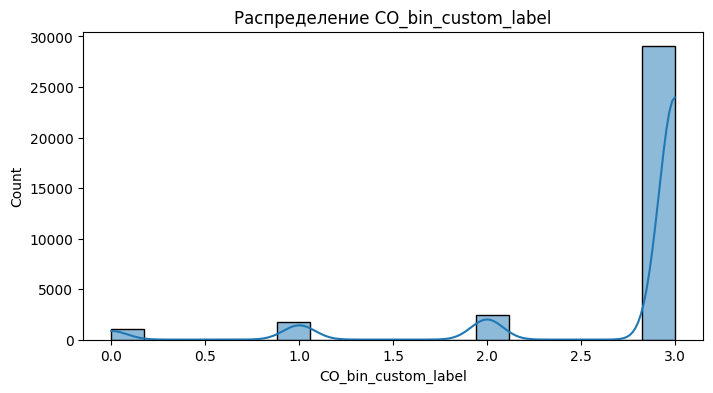

In [40]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(prsa_data[col], kde=True)
    plt.title(f'Распределение {col}')
    plt.show()

метод - Robust Scaling

In [41]:
robust_cols = ['SO2', 'NO2', 'CO']
scaler = RobustScaler()
prsa_data[robust_cols] = scaler.fit_transform(prsa_data[robust_cols])

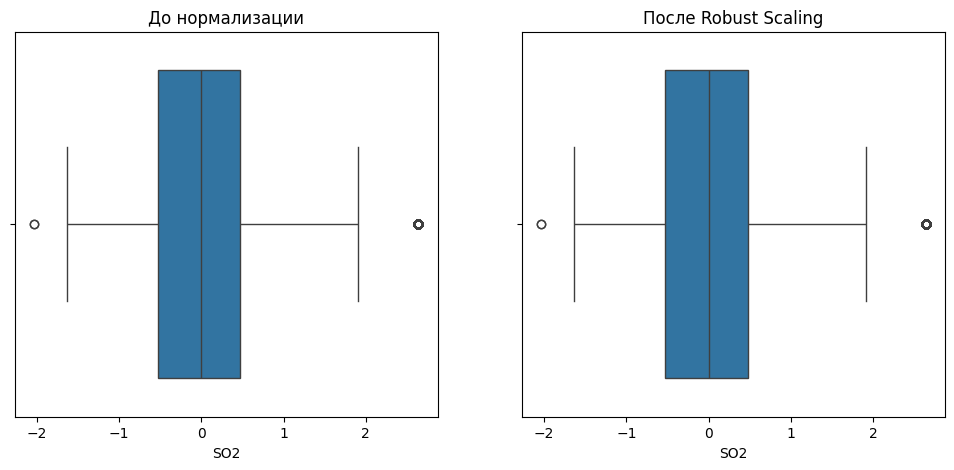

In [42]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=prsa_data, x='SO2')
plt.title('До нормализации')

plt.subplot(1, 2, 2)
sns.boxplot(data=prsa_data, x='SO2')
plt.title('После Robust Scaling')
plt.show()

## 5. Постройте кореллограмму по всем численным столбцам датасета. Сделайте вывод о значимости признаков.

In [43]:
numeric_cols = prsa_data.select_dtypes(include=['float64', 'int64']).columns
corr_data = prsa_data[numeric_cols]

In [44]:
print(f"Числовые столбцы: {numeric_cols.tolist()}")

Числовые столбцы: ['Unnamed: 0', 'No', 'SO2', 'NO2', 'CO', 'O3', 'PRES', 'WSPM', 'IS_RAIN', 'CO_bin_custom_label']


In [45]:
corr_matrix = corr_data.corr(method='pearson')

In [46]:
print(corr_matrix.round(2))

                     Unnamed: 0    No   SO2   NO2    CO    O3  PRES  WSPM  \
Unnamed: 0                 1.00  1.00 -0.36 -0.13  0.03  0.01  0.19 -0.05   
No                         1.00  1.00 -0.36 -0.13  0.03  0.01  0.19 -0.05   
SO2                       -0.36 -0.36  1.00  0.52  0.48 -0.15  0.25 -0.02   
NO2                       -0.13 -0.13  0.52  1.00  0.65 -0.46  0.13 -0.37   
CO                         0.03  0.03  0.48  0.65  1.00 -0.29  0.22 -0.26   
O3                         0.01  0.01 -0.15 -0.46 -0.29  1.00 -0.43  0.29   
PRES                       0.19  0.19  0.25  0.13  0.22 -0.43  1.00  0.11   
WSPM                      -0.05 -0.05 -0.02 -0.37 -0.26  0.29  0.11  1.00   
IS_RAIN                    0.01  0.01 -0.15 -0.11 -0.04 -0.02 -0.08 -0.05   
CO_bin_custom_label        0.09  0.09  0.15  0.27  0.26 -0.05 -0.07 -0.29   

                     IS_RAIN  CO_bin_custom_label  
Unnamed: 0              0.01                 0.09  
No                      0.01                 0.0

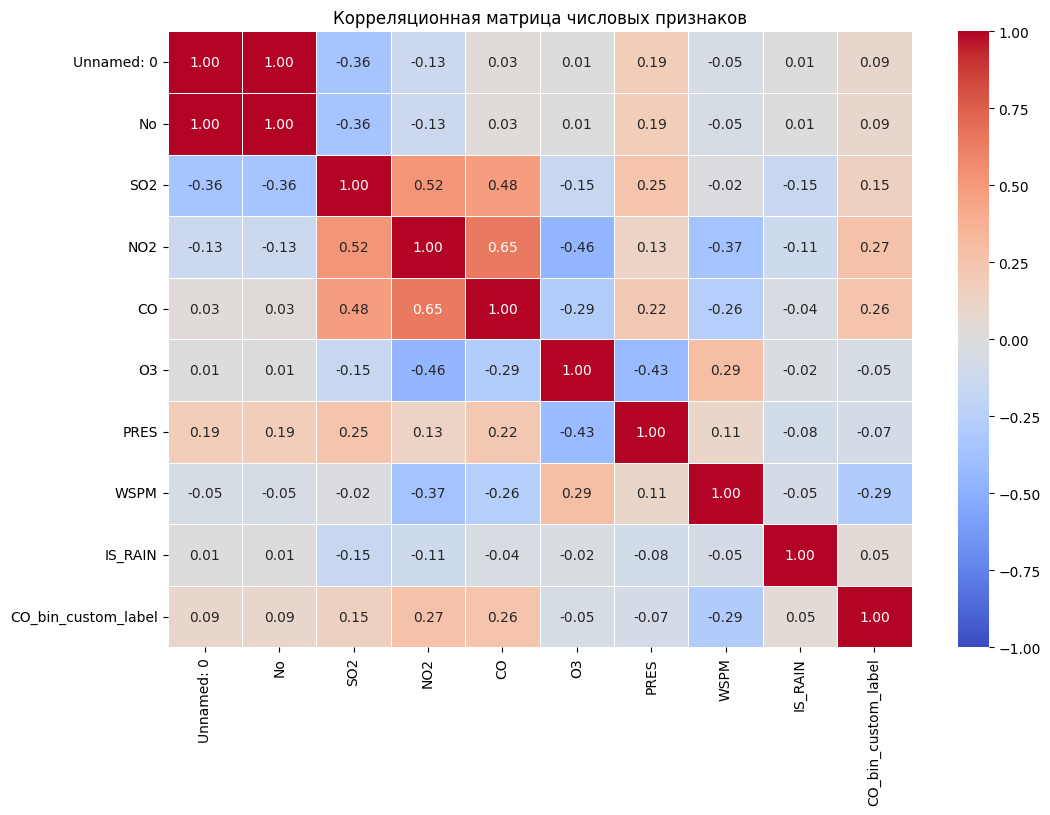

In [47]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.5,
)
plt.title("Корреляционная матрица числовых признаков")
plt.show()

## 6. Визуализируйте связи между признаками. Сделайте вывод об их взаимозависимости.

Тепловая карта корреляций

In [48]:
numeric_data = prsa_data.select_dtypes(include=['float64', 'int64'])

In [49]:
corr_matrix = numeric_data.corr()

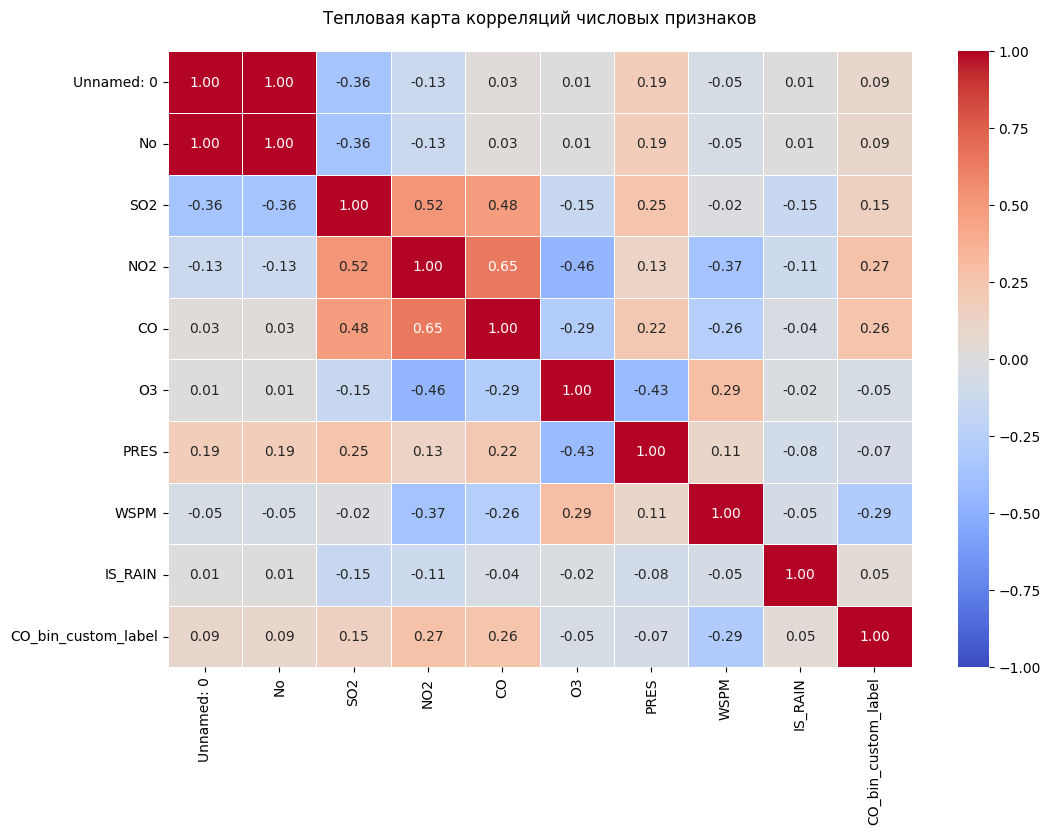

In [50]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
)
plt.title("Тепловая карта корреляций числовых признаков", pad=20)
plt.show()

Парные диаграммы рассеяния

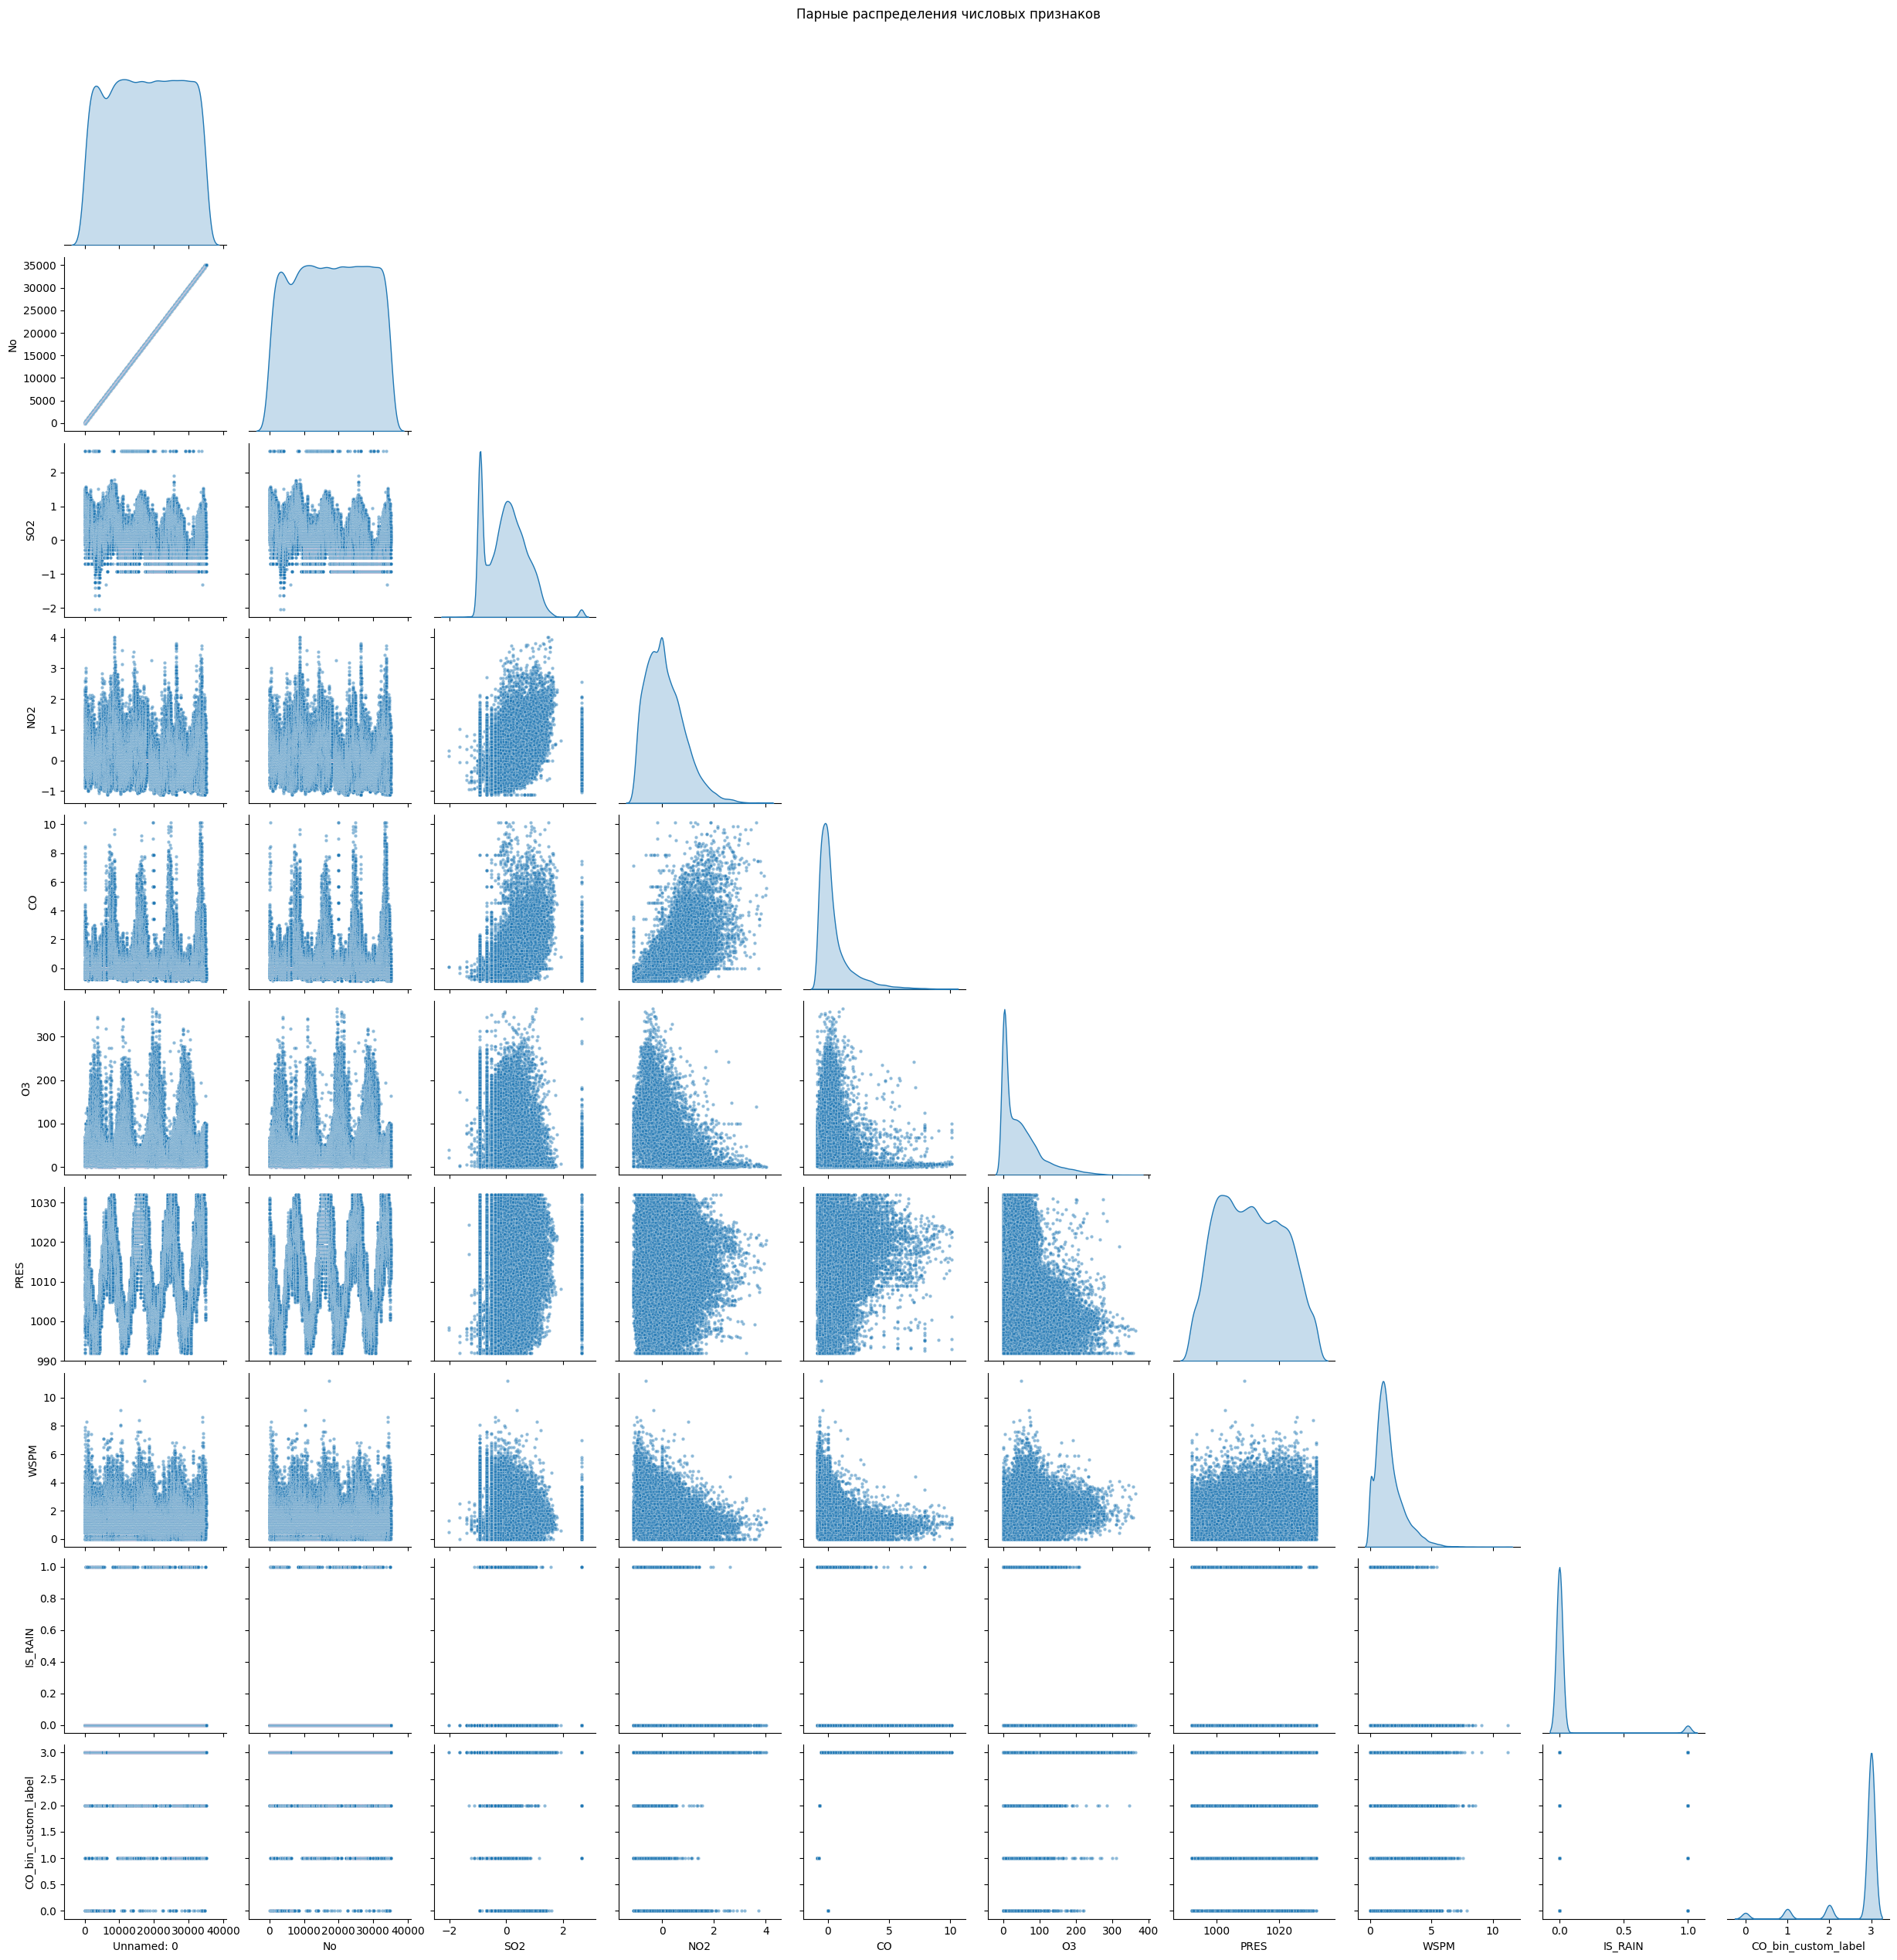

In [51]:
sns.pairplot(
    numeric_data,
    corner=True,
    diag_kind="kde",
    plot_kws={"alpha": 0.5, "s": 10},
)
plt.suptitle("Парные распределения числовых признаков", y=1.02)
plt.show()

Boxplot для категориальных признаков

<ipython-input-54-34bfe81763df>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


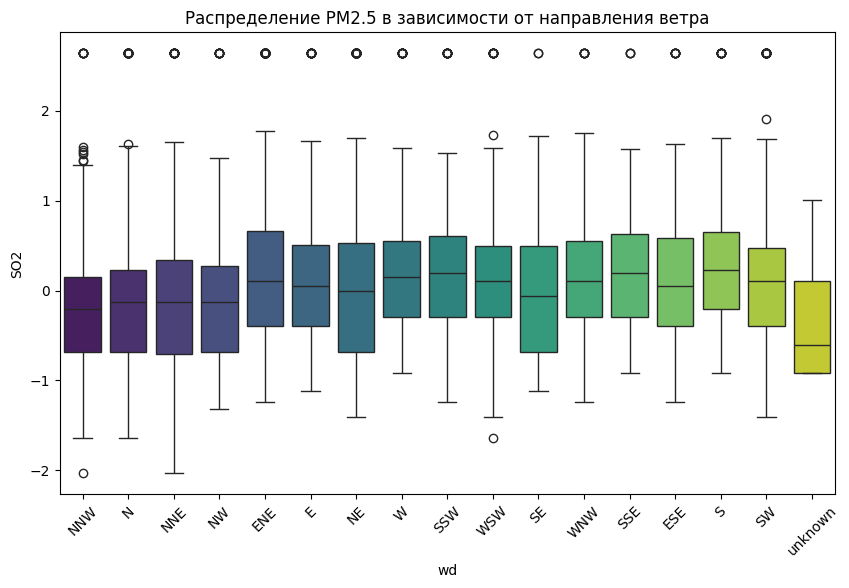

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="wd",
    y="SO2",
    data=prsa_data,
    palette="viridis",
)
plt.title("Распределение PM2.5 в зависимости от направления ветра")
plt.xticks(rotation=45)
plt.show()